<a href="https://colab.research.google.com/github/kkewat/Computer-vision/blob/main/Opencv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image
%matplotlib inline

In [ ]:
img_bgr = cv2.imread("download.jpg",cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

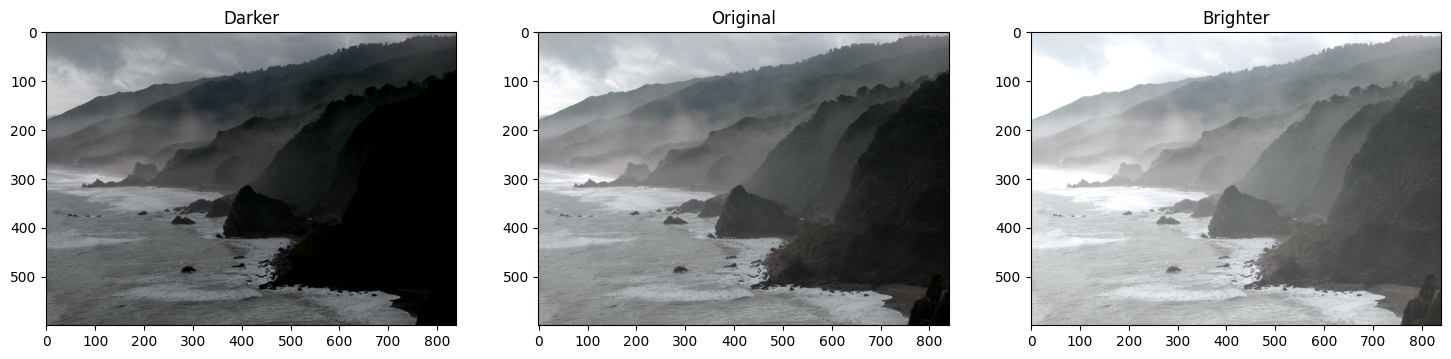

In [ ]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50
img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker   = cv2.subtract(img_rgb, matrix)
# Show the images
plt.figure(figsize=[18, 5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Brighter");

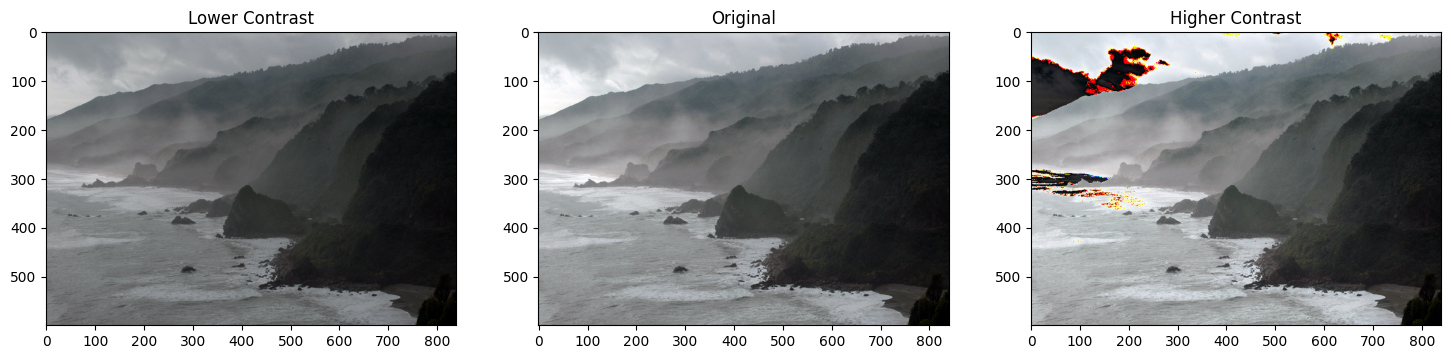

In [ ]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_darker   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");

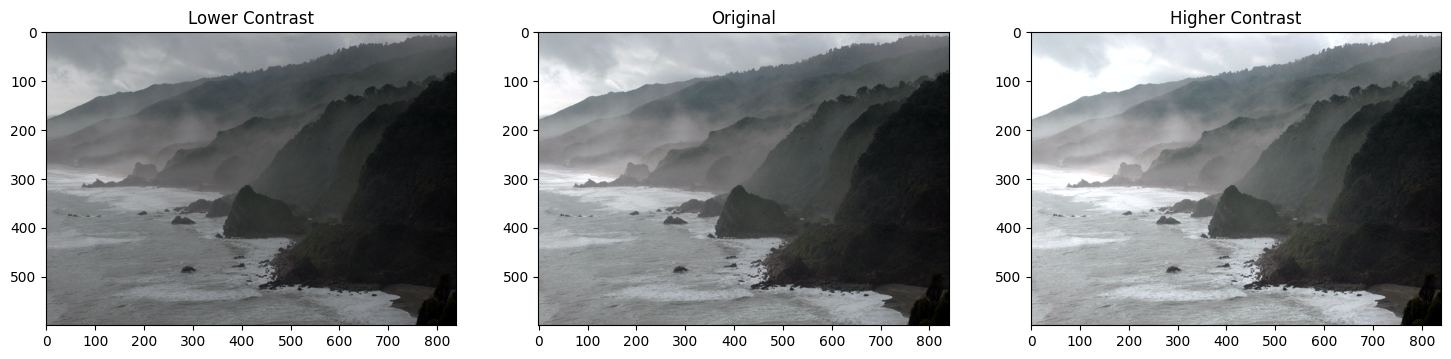

In [ ]:
matrix1 = np.ones(img_rgb.shape) * 0.8
matrix2 = np.ones(img_rgb.shape) * 1.2

img_rgb_lower  = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_higher = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2), 0, 255))

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_lower); plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);       plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_higher);plt.title("Higher Contrast");

(845, 900)


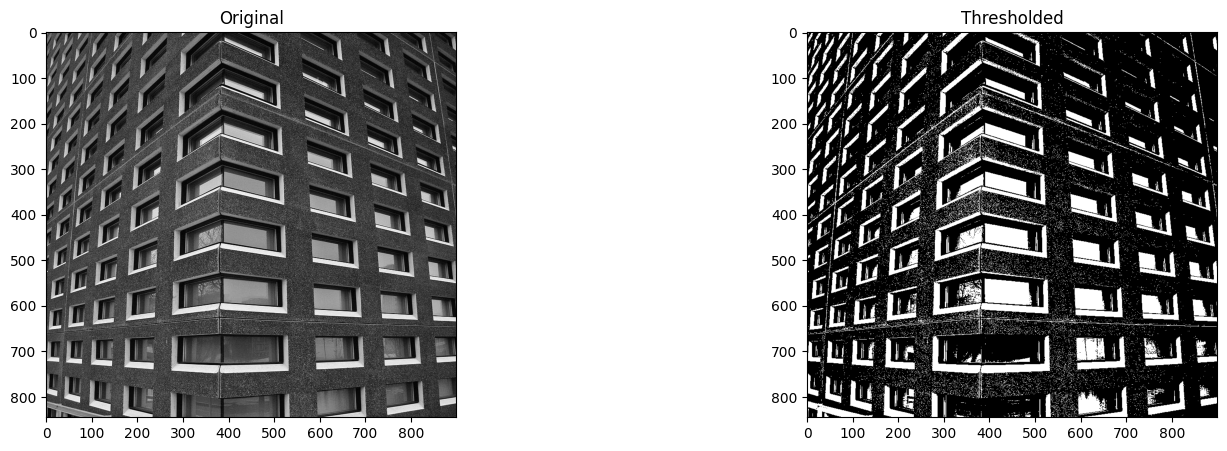

In [ ]:
img_read = cv2.imread("building-windows.jpg",cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read,100,1,cv2.THRESH_BINARY)

plt.figure(figsize=[18, 5])
plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")
print(img_thresh.shape)

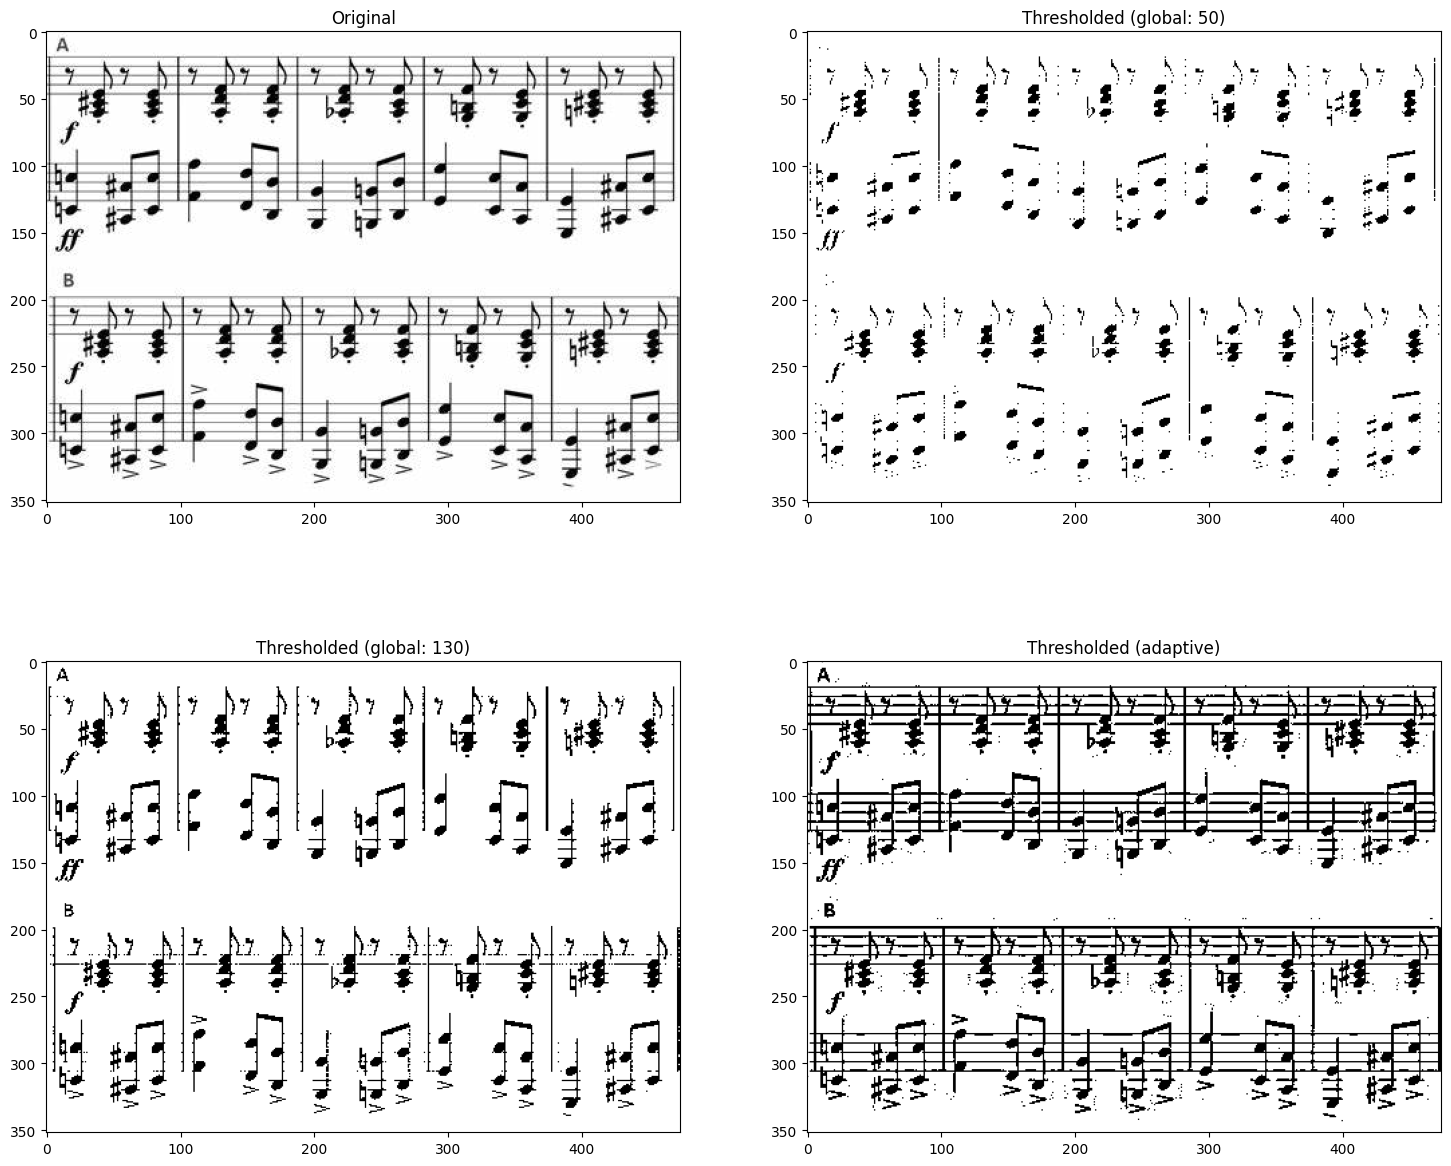

In [ ]:
img_read = cv2.imread("sheet.jpg", cv2.IMREAD_GRAYSCALE)

# Perform global thresholding
retval, img_thresh_gbl_1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)

# Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)

# Perform adaptive thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

(255, 255)


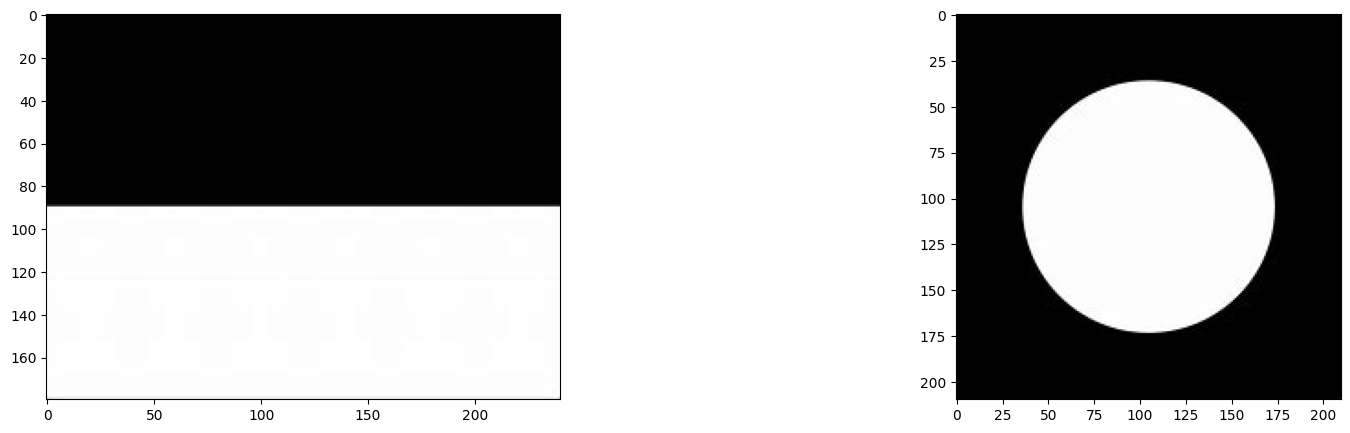

In [5]:
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)

img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20, 5])
plt.subplot(121);plt.imshow(img_rec, cmap="gray")
plt.subplot(122);plt.imshow(img_cir, cmap="gray")
dim = (255,255)
img_rec = cv2.resize(img_rec , dim, interpolation = cv2.INTER_AREA)
img_cir = cv2.resize(img_cir, dim, interpolation = cv2.INTER_AREA)
print(img_cir.shape)

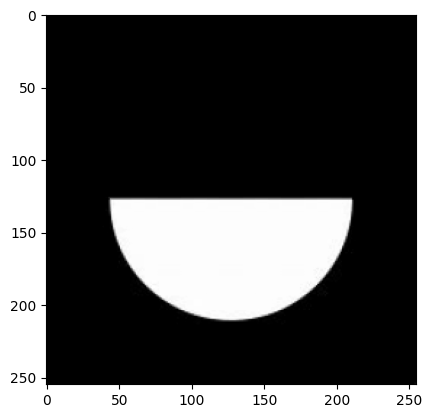

In [6]:
result = cv2.bitwise_and(img_rec, img_cir, mask = None)
plt.imshow(result, cmap="gray")

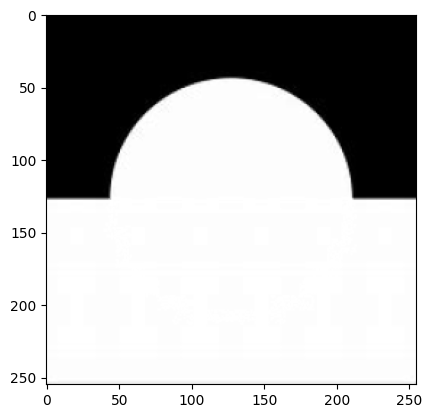

In [7]:
result = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

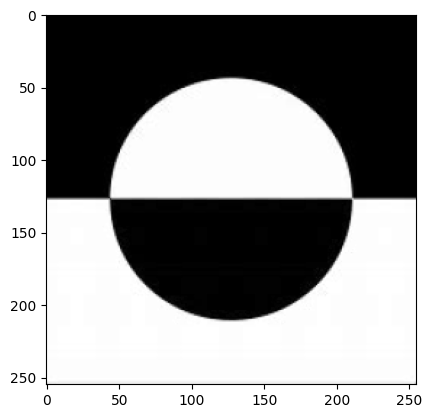

In [8]:
result = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result, cmap="gray")

(700, 700, 3)


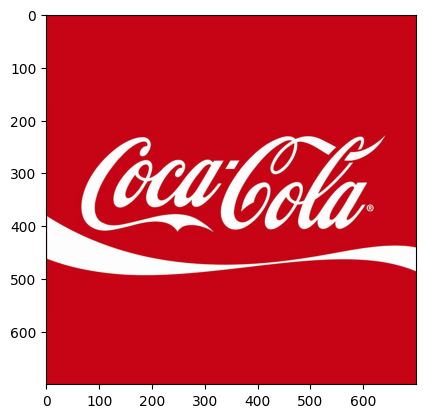

In [9]:
img_bgr = cv2.imread("Coca_Cola.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

print(img_rgb.shape)

logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

(700, 700, 3)


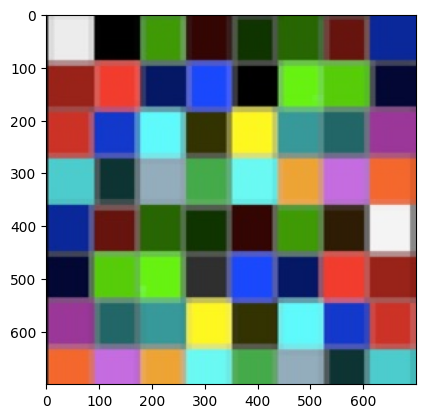

In [10]:
# Read in image of color cheackerboad background
img_background_bgr = cv2.imread("bg.jpg")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

# Set desired width (logo_w) and maintain image aspect ratio
aspect_ratio = logo_w / img_background_rgb.shape[1]
dim = (logo_w, int(img_background_rgb.shape[0] * aspect_ratio))

# Resize background image to sae size as logo image
img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

(700, 700)


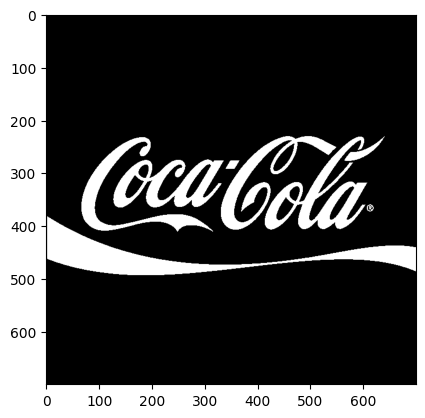

In [11]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Apply global thresholding to creat a binary mask of the logo
retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img_mask, cmap="gray")
print(img_mask.shape)

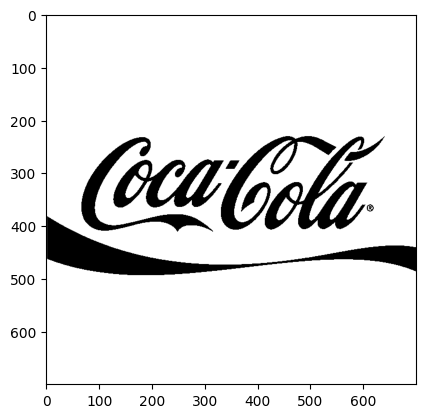

In [12]:
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv, cmap="gray")

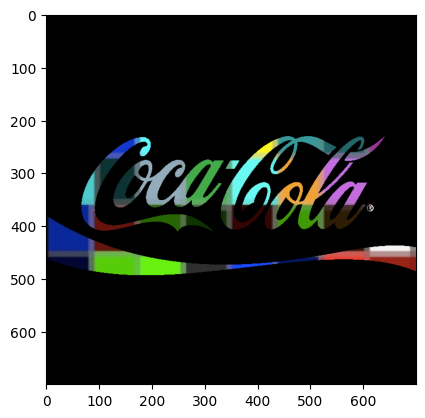

In [15]:
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

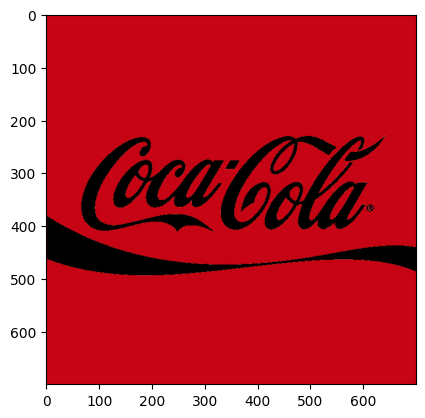

In [16]:
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

True

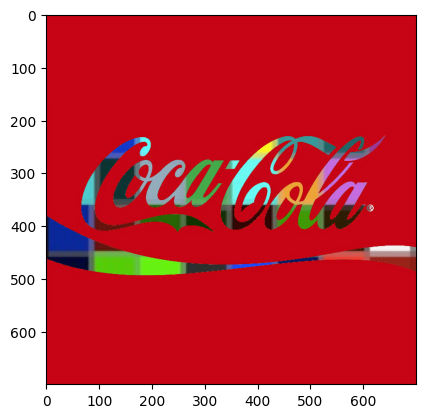

In [17]:
result = cv2.add(img_background, img_foreground)
plt.imshow(result)
cv2.imwrite("logo_final.png", result[:, :, ::-1])